# Segementación de imágenes

La segmentación de imágenes es un proceso fundamental en el procesamiento digital de imágenes, cuyo objetivo es dividir una imagen en regiones o segmentos que comparten características similares. Estos segmentos pueden representar diferentes objetos, formas, texturas o áreas de interés dentro de la imagen.

## Segmentación Basada en Textura

### ¿Qué es la textura en imágenes?
La textura en una imagen describe patrones repetitivos de variaciones en intensidad o color que forman una representación visual de las características de una superficie. Es un atributo clave que nos permite distinguir objetos que pueden tener colores o intensidades similares pero diferentes apariencias debido a sus patrones superficiales. 


Ejemplos típicos incluyen superficies como el césped, ladrillos, piel animal, y más.

- __Textura uniforme__: Donde los patrones son consistentes a lo largo de una región (por ejemplo, una pared lisa).
- __Textura no uniforme__: Donde los patrones varían dentro de una región (por ejemplo, hojas de un árbol).

### Importancia de la textura en segmentación

La textura juega un papel crucial en la segmentación de imágenes cuando la información de color o intensidad no es suficiente para diferenciar las diferentes regiones. En particular, la segmentación basada en textura es útil en situaciones donde las regiones tienen colores similares pero texturas distintas. Esto es común en aplicaciones como:

- Imágenes médicas: Distinguir entre diferentes tipos de tejidos o lesiones.
- Visión por computadora: Reconocimiento de objetos en entornos complejos.
- Análisis de materiales: Identificación de defectos o características en superficies industriales.

### Técnicas Comunes para la Segmentación Basada en Textura

Existen varias técnicas para analizar y segmentar texturas en imágenes. La segmentación por texturas es el proceso de dividir una imagen en regiones basadas en variaciones de textura, que pueden representar patrones o características repetitivas en la imagen. Algunas técnicas comunes para segmentación por texturas incluyen:

- **GLCM (Gray Level Co-occurrence Matrix)**: Detecta patrones de textura basados en la distribución de intensidades de grises.
- **Filtros de Gabor**: Capturan características de la textura a diferentes frecuencias y orientaciones.
- **Transformada de Wavelet**: Descompone la imagen en componentes de diferentes frecuencias para analizar las texturas.
- **LBP (Local Binary Patterns)**: Captura la textura local alrededor de un píxel comparando intensidades con sus vecinos.

## Método Completo de Segmentación Basada en Textura

Un pipeline típico para segmentar una imagen basada en textura sigue estos pasos:

1) Preprocesar la imagen (por ejemplo, convertirla a escala de grises).

2) Aplicar un método de análisis de textura (GLCM, filtros de Gabor, etc.).

3) Extraer características de textura relevantes (como contraste, homogeneidad, frecuencia).

4) Aplicar un método de segmentación (como k-means o segmentación por umbral) en función de las características de textura extraídas.

In [43]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [44]:
# Cargar la imagen en color
img = cv2.imread('rafa.jpg', cv2.IMREAD_COLOR)

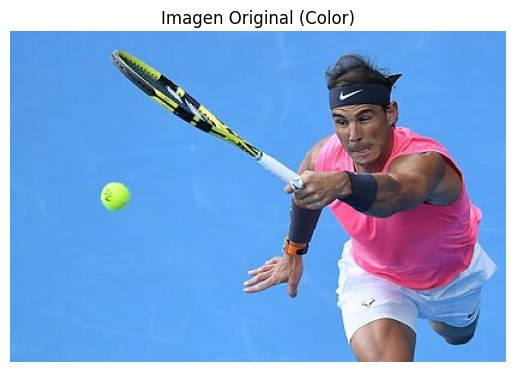

In [45]:
# Convertir de BGR (formato de OpenCV) a RGB (formato de Matplotlib)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Mostrar la imagen en color
plt.imshow(img_rgb)
plt.title('Imagen Original (Color)')
plt.axis('off')  # Ocultar los ejes
plt.show()

In [46]:
img_rgb

array([[[ 79, 150, 228],
        [ 79, 150, 228],
        [ 79, 150, 228],
        ...,
        [ 88, 159, 239],
        [ 88, 159, 239],
        [ 88, 159, 239]],

       [[ 79, 150, 228],
        [ 79, 150, 228],
        [ 79, 150, 228],
        ...,
        [ 88, 159, 239],
        [ 88, 159, 239],
        [ 88, 159, 239]],

       [[ 79, 150, 228],
        [ 79, 150, 228],
        [ 79, 150, 228],
        ...,
        [ 88, 159, 239],
        [ 88, 159, 239],
        [ 88, 159, 239]],

       ...,

       [[ 86, 159, 236],
        [ 86, 159, 236],
        [ 86, 159, 236],
        ...,
        [ 92, 165, 244],
        [ 93, 166, 245],
        [ 94, 167, 246]],

       [[ 85, 158, 235],
        [ 85, 158, 235],
        [ 85, 158, 235],
        ...,
        [ 92, 165, 244],
        [ 93, 166, 245],
        [ 94, 167, 246]],

       [[ 84, 157, 234],
        [ 84, 157, 234],
        [ 84, 157, 234],
        ...,
        [ 92, 165, 244],
        [ 93, 166, 245],
        [ 94, 167, 246]]

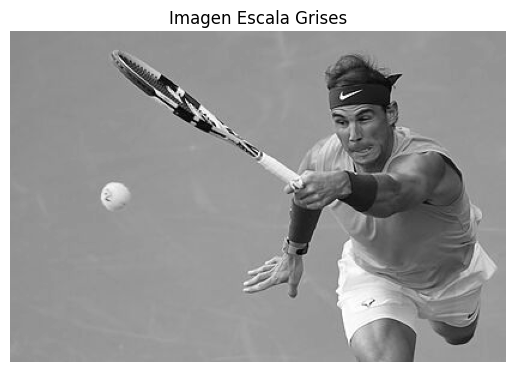

In [47]:
# Cargar imagen en escala de grises
img = cv2.imread('rafa.jpg', cv2.IMREAD_GRAYSCALE)


# Mostrar la imagen original
plt.imshow(img,cmap='gray')
plt.title('Imagen Escala Grises')
plt.axis('off')
plt.show()

In [48]:
img

array([[138, 138, 138, ..., 147, 147, 147],
       [138, 138, 138, ..., 147, 147, 147],
       [138, 138, 138, ..., 147, 147, 147],
       ...,
       [146, 146, 146, ..., 152, 153, 154],
       [145, 145, 145, ..., 152, 153, 154],
       [144, 144, 144, ..., 152, 153, 154]], dtype=uint8)

#### Filtro Gabor

Se basa en la función de Gabor, que combina una onda sinusoidal y una envoltura gaussiana. Esto permite que el filtro de Gabor sea sensible a diferentes orientaciones y escalas, lo que lo convierte en un recurso útil para detectar patrones en imágenes.

Definición Matemática
La función de Gabor se define matemáticamente como:

$
g(x, y) = \frac{1}{2\pi \sigma^2} e^{-\frac{x'^2 + y'^2}{2\sigma^2}} e^{j(2\pi f x' + \theta)}
$

Donde:
- $ x' = x \cos(\theta) + y \sin(\theta) $
- $ y' = -x \sin(\theta) + y \cos(\theta) $
- $ \sigma $ es el ancho de la envoltura gaussiana (controla la escala).
- $ f $ es la frecuencia de la onda (controla la frecuencia del patrón).
- $ \theta $ es la orientación del filtro (determina la dirección de detección).

Propiedades
1. Sensibilidad a la Frecuencia y la Orientación:

  - Los filtros de Gabor son capaces de detectar características específicas en imágenes según la frecuencia y la orientación elegidas. Esto es crucial en la identificación de texturas complejas.

2. Localidad:

   - Debido a la envoltura gaussiana, los filtros de Gabor son localizados en el espacio, lo que significa que pueden capturar detalles a escala local en la imagen.

3. Multiescala y Multiorientación:

  - Al aplicar filtros de Gabor en diferentes escalas y orientaciones, se pueden obtener características ricas y completas de la textura en la imagen.

4. Aplicaciones

  - Análisis de Textura: Los filtros de Gabor se utilizan para caracterizar texturas en imágenes, lo que es útil en aplicaciones de reconocimiento de patrones.

  - Reconocimiento Facial: En el reconocimiento de rostros, los filtros de Gabor ayudan a identificar características únicas de los rostros.


  - Clasificación de Imágenes: Se utilizan en sistemas de clasificación que analizan texturas, como en la identificación de materiales o superficies.

En el código
- **ksize**: Tamaño del kernel (matriz de convolución).
- **sigma**: Desviación estándar de la gaussiana utilizada en el filtro.
- **theta**: Ángulo de orientación del filtro (dirección en la que el filtro detectará características).
- **lambd**: Longitud de onda del filtro sinusoidal (espaciado entre líneas detectadas).
- **gamma**: Relación de aspecto que controla la "elipticidad" del filtro.
- **psi**: Fase del filtro sinusoidal.
- **ktype**: Tipo de datos, en este caso, flotantes de 64 bits.

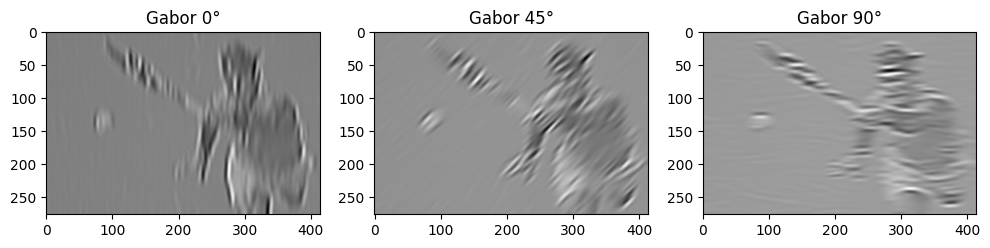

In [59]:
# Aplicar un filtro de Gabor
def gabor_filter(img, ksize, sigma, theta, lambd, gamma, psi):
    gabor = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, psi, ktype=cv2.CV_64F)
    filtered_img = cv2.filter2D(img, cv2.CV_64F, gabor)
    return filtered_img

# Parametrizar el filtro de Gabor
ksize = 31     # Tamaño del kernel (31x31)
sigma = 4.0    # Desviación estándar de la gaussiana
lambd = 10.0   # Longitud de onda
gamma = 0.5    # Relación de aspecto
psi = 0        # Fase

# Aplicar el filtro de Gabor en diferentes ángulos
gabor_0 = gabor_filter(img, ksize, sigma, 0, lambd, gamma, psi)
gabor_45 = gabor_filter(img, ksize, sigma, np.pi/4, lambd, gamma, psi)
gabor_90 = gabor_filter(img, ksize, sigma, np.pi/2, lambd, gamma, psi)

# Mostrar los resultados
plt.figure(figsize=(12, 4))
plt.subplot(131), plt.imshow(gabor_0, cmap='gray'), plt.title('Gabor 0°')
plt.subplot(132), plt.imshow(gabor_45, cmap='gray'), plt.title('Gabor 45°')
plt.subplot(133), plt.imshow(gabor_90, cmap='gray'), plt.title('Gabor 90°')
plt.show()


### Filtro Local Binary Patterns (LBP)
El Local Binary Patterns (LBP) es un método de análisis de textura que se utiliza en el procesamiento de imágenes y visión por computadora. Es especialmente popular en tareas de reconocimiento de patrones y clasificación de imágenes debido a su simplicidad, eficiencia y robustez ante cambios en la iluminación. Aquí te explico cómo funciona, su implementación y sus aplicaciones.

**¿Qué es LBP?**
El LBP es un descriptor que transforma una imagen en una representación que captura la textura local de la imagen. Este método analiza cada píxel en la imagen y compara su intensidad con los píxeles vecinos en un vecindario definido (típicamente en un patrón circular alrededor del píxel central).

**¿Cómo funciona LBP?**
Selección del píxel central: Para cada píxel en la imagen, se selecciona como referencia.

- **Comparación con vecinos**: Los píxeles adyacentes (en un radio definido) se comparan con el valor del píxel central. Si el valor del vecino es mayor o igual al del píxel central, se asigna un valor de 1, de lo contrario, se asigna un valor de 0.

- **Creación del patrón binario**: Esto genera un patrón binario de `1s` y `0s` que representa la relación del píxel central con sus vecinos.

- **Conversión a decimal**: El patrón binario se convierte en un número decimal, que se utiliza para representar la textura local en esa región de la imagen.

- **Histograma**: Se puede construir un histograma de los valores LBP para toda la imagen, lo que proporciona una representación global de la textura.

**Ejemplo**



Consideremos la siguiente matriz de píxeles como una imagen de 3x3:

```css
[  2  3  4 ]
[  5  *  6 ]
[  7  8  9 ]

```
1) : Comparación con Píxeles Vecinos

Para el cálculo del LBP, comparamos el píxel central (5) con sus vecinos. Utilizando un vecindario de 3x3, los píxeles vecinos son:
```
Superior Izquierdo (2)
Superior (3)
Superior Derecho (4)
Izquierda (5)
Derecha (6)
Inferior Izquierdo (7)
Inferior (8)
Inferior Derecho (9)
```
2) : Generación del Patrón Binario

Comparamos cada píxel vecino con el píxel central (5):
```
2 < 5 → 0
3 < 5 → 0
4 < 5 → 0
5 = 5 → 0
6 > 5 → 1
7 > 5 → 1
8 > 5 → 1
9 > 5 → 1
```

Esto genera el patrón binario: `00001111`.

Patrón binario:   `00001111`

Patrón decimal:   `0 * 2^7 + 0 * 2^6 + 0 * 2^5 + 0 * 2^4 + 1 * 2^3 + 1 * 2^2 + 1 * 2^1 + 1 * 2^0 = 0 + 0 + 0 + 0 + 8 + 4 + 2 + 1 = 15`

**Aplicaciones de LBP**
- **Reconocimiento de rostros**: LBP se utiliza en sistemas de reconocimiento facial debido a su capacidad para capturar texturas locales y patrones de iluminación.

- **Clasificación de texturas**: Es útil en la clasificación de diferentes texturas en imágenes, como superficies rugosas o suaves.

- **Detección de objetos**: En sistemas de visión por computadora, LBP puede ayudar a identificar y clasificar objetos en imágenes.

- **Análisis de imágenes médicas**: Se utiliza en la detección de características relevantes en imágenes médicas, como tumores o tejidos anormales.

**Ventajas de LBP**
- **Invariabilidad ante cambios de iluminación**: LBP es robusto frente a variaciones en la iluminación, lo que lo hace efectivo en condiciones del mundo real.

- **Simplicidad y eficiencia**: Su implementación es sencilla y rápida, lo que lo hace adecuado para aplicaciones en tiempo real.

- **Bajo costo computacional**: Requiere menos recursos computacionales en comparación con otros métodos de análisis de texturas.

**Desventajas de LBP**
- **Ruido**: El método puede ser sensible al ruido, lo que puede afectar la calidad del descriptor.

- **No captura información global**: LBP se centra en características locales y puede perder información de patrones más amplios en la imagen.

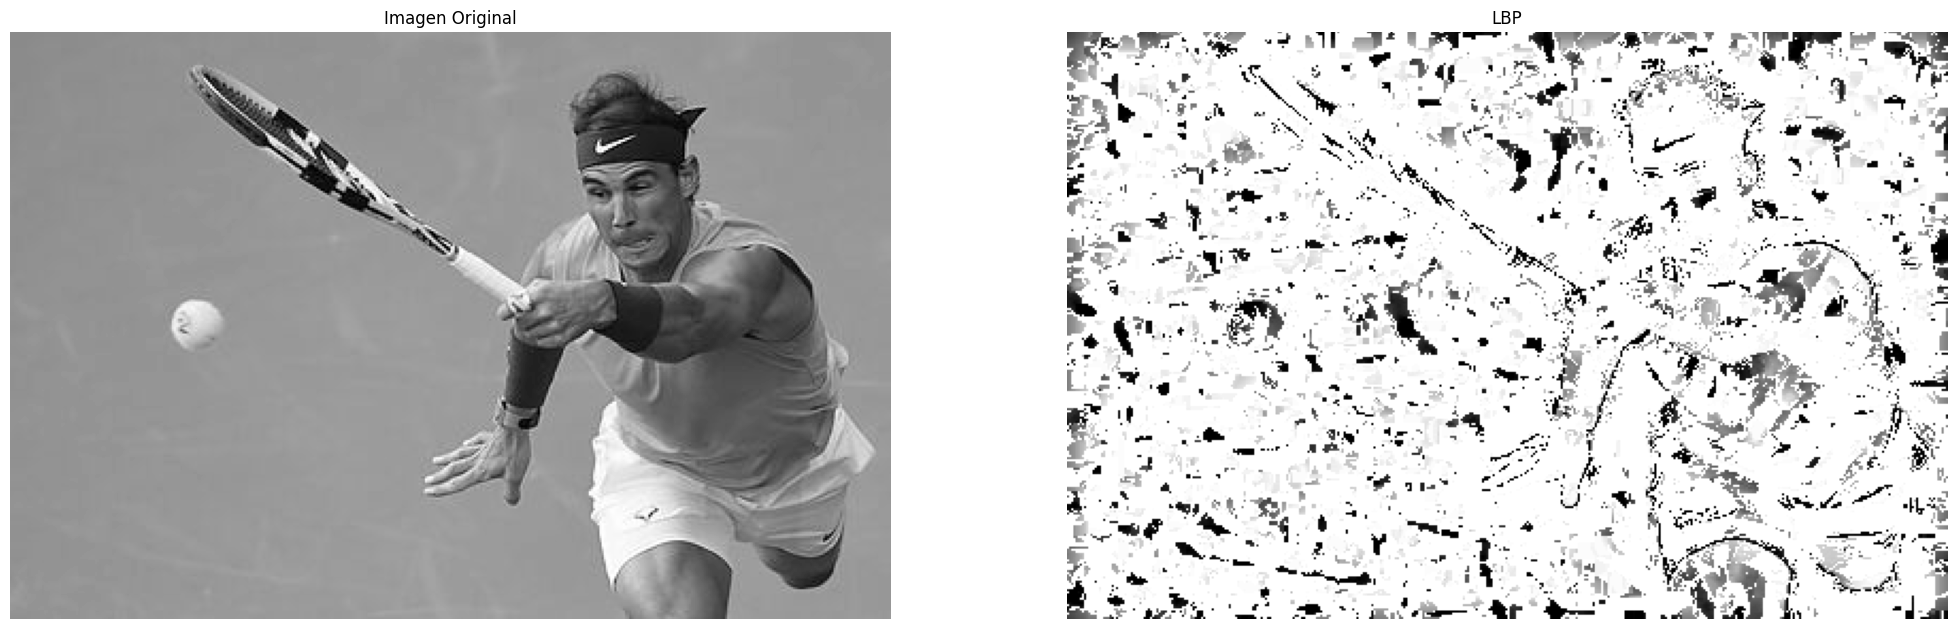

In [55]:
from skimage.feature import local_binary_pattern

# Parámetros para LBP
radius = 10  # Radio del círculo
n_points = 8 * radius  # Número de puntos en el círculo



# Aplicar el LBP (Local Binary Pattern)
lbp = local_binary_pattern(img ,n_points, radius, method="uniform")

# Mostrar el LBP resultante
plt.figure(figsize=(25, 25))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(122)
plt.imshow(lbp, cmap='gray')
plt.title('LBP')
plt.axis('off')
plt.show()

In [11]:
!pip install PyWavelets

  Using cached pywavelets-1.7.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.5 MB)


### Transformada Wavelet Discreta (DWT) - Explicación
La Transformada Wavelet Discreta (DWT) es una herramienta matemática utilizada para analizar señales e imágenes en diferentes escalas o resoluciones. A diferencia de otras transformadas como la Transformada de Fourier, que trabajan en el dominio de la frecuencia, la DWT permite un análisis simultáneo tanto en el dominio del tiempo (o espacio) como en el dominio de la frecuencia, lo que la hace ideal para capturar detalles locales de la señal o imagen.

**¿Cómo funciona la DWT?**
La DWT descompone una señal o imagen en varias sub-bandas mediante una serie de filtros de paso bajo y paso alto, separando las componentes de baja frecuencia (aproximaciones) y alta frecuencia (detalles). En imágenes, esta descomposición permite dividir la imagen en diferentes niveles de detalle, a menudo usados para análisis multiresolución, compresión y eliminación de ruido.

**Descomposición en imágenes 2D**
En el caso de las imágenes, la DWT realiza una descomposición bidimensional aplicando la transformada de wavelet en las filas y luego en las columnas. Esto genera cuatro sub-bandas principales:

- LL (Baja frecuencia en ambas direcciones - Aproximación):
Es la sub-banda que contiene la mayor parte de la información de la imagen original. Representa una versión suavizada y de baja resolución de la imagen.

- LH (Baja frecuencia en la dirección vertical, alta frecuencia en la horizontal - Detalles horizontales):
Contiene la información relacionada con los cambios o bordes a lo largo de la dirección horizontal de la imagen.

- HL (Alta frecuencia en la dirección vertical, baja frecuencia en la horizontal - Detalles verticales):
Contiene la información de los bordes y detalles verticales.

- HH (Alta frecuencia en ambas direcciones - Detalles diagonales):
Contiene la información de los bordes y detalles en la dirección diagonal.

Código

- **DWT**: Descompone la imagen en cuatro sub-bandas:
- **LL**: Aproximación (baja frecuencia, información principal de la imagen).
- **LH**: Detalle horizontal.
- **HL**: Detalle vertical.
- **HH**: Detalle diagonal.

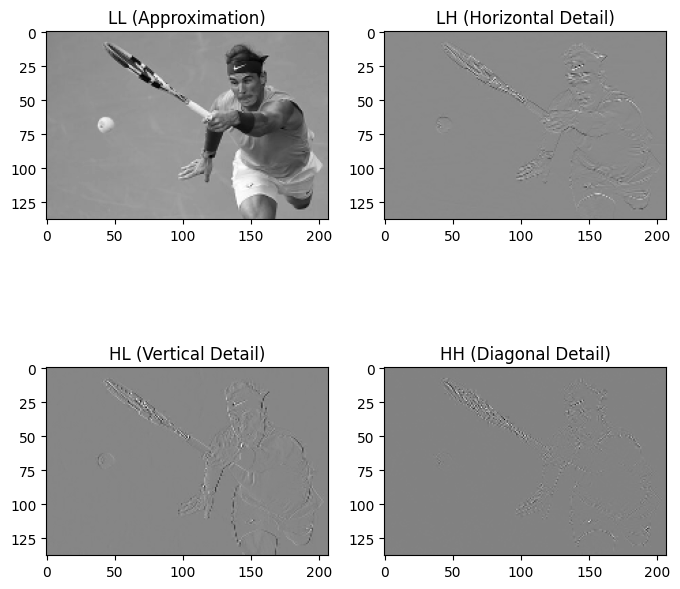

In [39]:
import pywt

# Aplicar la transformada wavelet
coeffs2 = pywt.dwt2(img, 'haar')
LL, (LH, HL, HH) = coeffs2

# Mostrar las diferentes sub-bandas
plt.figure(figsize=(8, 8))
plt.subplot(221), plt.imshow(LL, cmap='gray'), plt.title('LL (Approximation)')
plt.subplot(222), plt.imshow(LH, cmap='gray'), plt.title('LH (Horizontal Detail)')
plt.subplot(223), plt.imshow(HL, cmap='gray'), plt.title('HL (Vertical Detail)')
plt.subplot(224), plt.imshow(HH, cmap='gray'), plt.title('HH (Diagonal Detail)')
plt.show()
